<a href="https://colab.research.google.com/github/RakaAdmiharfan/FindIT-IBD/blob/main/FindIT_IBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Indonesia Bagian Data:
1. Amjad Adhie
2. Iskandar Muda
3. Raka Admiharfan Fatihah

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf


Dataset

In [ ]:
train = pd.read_csv('train_features.csv')
train.insert(0, 'ID', 0)
train.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,0,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,0,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,0,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,0,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [ ]:
test_set = pd.read_csv('test_features.csv')
test_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [ ]:
label = pd.read_csv('train_labels.csv')
label.head()

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4


In [ ]:
# Menggabungkan data train dan label
train_set = train.join(label)

# EDA (Exploratory Data Analysis)

In [ ]:
# memeriksa setiap kolom dari data train yang kosong
train_set.isnull().sum()

ID                            0
tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64

In [ ]:
train_set['pendidikan'].unique()

array(['Sarjana', 'Magister', 'SMA', 'SMP', 'Doktor', nan, '5'],
      dtype=object)

In [ ]:
non_numeric_columns = train_set.select_dtypes(exclude=['float64', 'int64']).columns
print("Kolom Non-Numerik:", non_numeric_columns)

# Periksa nilai unik dalam kolom non-numerik
for column in non_numeric_columns:
    print("Nilai Unik untuk Kolom", column, ":", train_set[column].unique())

Kolom Non-Numerik: Index(['pendidikan', 'status_pernikahan', 'tanggal_menjadi_anggota'], dtype='object')
Nilai Unik untuk Kolom pendidikan : ['Sarjana' 'Magister' 'SMA' 'SMP' 'Doktor' nan '5']
Nilai Unik untuk Kolom status_pernikahan : ['Rencana Menikah' 'Menikah' 'Sendiri' 'Cerai' nan 'Cerai Mati' '5']
Nilai Unik untuk Kolom tanggal_menjadi_anggota : ['2014-05-05' '2013-03-17' nan '2013-05-03' '2013-11-21' '2012-11-14'
 '2013-06-23' '2012-10-06' '2013-02-11' '2014-03-28' '2012-11-10'
 '2013-05-02' '2013-01-18' '2014-01-10' '2014-03-14' '2014-02-18'
 '2013-07-06' '2014-02-27' '2014-01-25' '2013-07-05' '2013-05-08'
 '2013-03-30' '2014-06-11' '2013-03-31' '2012-11-06' '2013-04-14'
 '2013-03-12' '2013-05-31' '2013-05-17' '2012-09-13' '2013-09-12'
 '2014-05-14' '2014-05-09' '2013-10-15' '2013-09-06' '2012-12-10'
 '2013-04-13' '2014-03-17' '2013-08-08' '2012-08-19' '2013-01-16'
 '2014-05-23' '2013-03-29' '2014-06-27' '2012-09-06' '2013-09-02'
 '2013-02-19' '2013-02-10' '2013-05-26' '2014-03

In [ ]:
# # Menghitung korelasi antara variabel numerik
# corr = train_set.corr()

# # Membuat heatmap dari korelasi
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Heatmap Korelasi antara Variabel dalam Data Train dan Label')
# plt.show()

In [ ]:
train_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,0,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,0,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,0,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,0,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


## Data Preparation

### Drop Duplicate Data

In [ ]:
# drop row has similar value
print("Rows before dropping duplicates:", len(train_set))
train_set.drop_duplicates(inplace=True)
print("Rows after dropping duplicates:", len(train_set))

train_set.reset_index(drop=True, inplace=True)

Rows before dropping duplicates: 3817
Rows after dropping duplicates: 3817


No duplicate rows in the training data.

In [ ]:
# Drop row has all NaN value
print("Rows before dropping all NaN value:", len(train_set))
train_set.dropna(how='all', inplace=True)
print("Rows after dropping all NaN value:", len(train_set))


Rows before dropping all NaN value: 3817
Rows after dropping all NaN value: 3817


In [ ]:
# Drop column tanggal_menjadi_anggota
train_set.drop('tanggal_menjadi_anggota', axis=1, inplace=True)
# train_set.drop('tahun_kelahiran', axis=1, inplace=True)
# train_set.head()

In [ ]:
# kucing 3
# Drop column tanggal_menjadi_anggota pada test_set
test_set.drop('tanggal_menjadi_anggota', axis=1, inplace=True)
# test_set.drop('tahun_kelahiran', axis=1, inplace=True)


# train_set['pembelian_web'].fillna(0, inplace=True)
# train_set['pembelian_toko'].fillna(0, inplace=True)
# train_set['belanja_ikan'].fillna(0, inplace=True)
# train_set['belanja_kue'].fillna(0, inplace=True)
# train_set['belanja_daging'].fillna(0, inplace=True)
# train_set['belanja_buah'].fillna(0, inplace=True)
# train_set['jumlah_anak_remaja'].fillna(0, inplace=True)
# train_set['jumlah_anak_balita'].fillna(0, inplace=True)

train_set['pembelian_web'].fillna(train_set['pembelian_web'].median(), inplace=True)
train_set['pembelian_toko'].fillna(train_set['pembelian_toko'].median(), inplace=True)
train_set['belanja_ikan'].fillna(train_set['belanja_ikan'].median(), inplace=True)
train_set['belanja_kue'].fillna(train_set['belanja_kue'].median(), inplace=True)
train_set['belanja_daging'].fillna(train_set['belanja_daging'].median(), inplace=True)
train_set['belanja_buah'].fillna(train_set['belanja_buah'].median(), inplace=True)
train_set['jumlah_anak_remaja'].fillna(0, inplace=True)
train_set['jumlah_anak_balita'].fillna(0, inplace=True)

test_set['pembelian_web'].fillna(test_set['pembelian_web'].median(), inplace=True)
test_set['pembelian_toko'].fillna(test_set['pembelian_toko'].median(), inplace=True)
test_set['belanja_ikan'].fillna(test_set['belanja_ikan'].median(), inplace=True)
test_set['belanja_kue'].fillna(test_set['belanja_kue'].median(), inplace=True)
test_set['belanja_daging'].fillna(test_set['belanja_daging'].median(), inplace=True)
test_set['belanja_buah'].fillna(test_set['belanja_buah'].median(), inplace=True)
test_set['jumlah_anak_remaja'].fillna(0, inplace=True)
test_set['jumlah_anak_balita'].fillna(0, inplace=True)

train_set['total_pembelian'] = (
            train_set['pembelian_web'] + train_set['pembelian_toko']
        )

train_set['total_belanja'] = (
            train_set['belanja_kue'] + train_set['belanja_daging'] +
            train_set['belanja_ikan'] + train_set['belanja_buah']
        )

train_set['total_anak'] = (
            train_set['jumlah_anak_remaja'] + train_set['jumlah_anak_balita']
        )
test_set['total_belanja'] = (
            test_set['belanja_kue'] + test_set['belanja_daging'] +
            test_set['belanja_ikan'] + test_set['belanja_buah']
        )

test_set['total_anak'] = (
            test_set['jumlah_anak_remaja'] + test_set['jumlah_anak_balita']
        )

test_set['total_pembelian'] = (
            test_set['pembelian_web'] + test_set['pembelian_toko']
        )
train_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi,total_pembelian,total_belanja,total_anak
0,0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2,7.0,382347.0,1.0
1,0,1950,Sarjana,Rencana Menikah,84063000.0,0.0,0.0,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,0,10.0,151725.0,0.0
2,0,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,1,8.0,624985.0,0.0
3,0,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,4,15.0,1973840.0,0.0
4,0,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,4,11.0,476553.0,2.0


## Split Training Set and Validation Set

In [ ]:
from sklearn.model_selection import train_test_split

# Save original training set
train_set_ori = train_set.copy()

# train_set.drop('tanggal_menjadi_anggota', axis=1, inplace=True)
# Split training set and validation set
train_set, val_set = train_test_split(train_set, test_size=0.2, stratify=train_set['jumlah_promosi'], random_state=42)

val_set['ID'] = val_set.reset_index().index

In [ ]:
val_set['jumlah_promosi'].head(200)

# Cara cek kolom id dan jumlah_promosi
# val_set.head()

2464    2
480     2
2368    3
3457    3
503     5
       ..
2390    2
1363    1
62      2
295     3
1721    0
Name: jumlah_promosi, Length: 200, dtype: int64

In [ ]:
print(len(train_set))
print(len(val_set))

3053
764


## Preprocessing

### Handle Missing Values¶

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3053 entries, 2329 to 206
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3053 non-null   int64  
 1   tahun_kelahiran     3053 non-null   int64  
 2   pendidikan          2899 non-null   object 
 3   status_pernikahan   2879 non-null   object 
 4   pendapatan          2898 non-null   float64
 5   jumlah_anak_balita  3053 non-null   float64
 6   jumlah_anak_remaja  3053 non-null   float64
 7   terakhir_belanja    2907 non-null   float64
 8   belanja_buah        3053 non-null   float64
 9   belanja_daging      3053 non-null   float64
 10  belanja_ikan        3053 non-null   float64
 11  belanja_kue         3053 non-null   float64
 12  pembelian_diskon    2909 non-null   float64
 13  pembelian_web       3053 non-null   float64
 14  pembelian_toko      3053 non-null   float64
 15  keluhan             2887 non-null   float64
 16  jumlah_pr

In [ ]:
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 2464 to 2265
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  764 non-null    int64  
 1   tahun_kelahiran     764 non-null    int64  
 2   pendidikan          729 non-null    object 
 3   status_pernikahan   726 non-null    object 
 4   pendapatan          729 non-null    float64
 5   jumlah_anak_balita  764 non-null    float64
 6   jumlah_anak_remaja  764 non-null    float64
 7   terakhir_belanja    738 non-null    float64
 8   belanja_buah        764 non-null    float64
 9   belanja_daging      764 non-null    float64
 10  belanja_ikan        764 non-null    float64
 11  belanja_kue         764 non-null    float64
 12  pembelian_diskon    730 non-null    float64
 13  pembelian_web       764 non-null    float64
 14  pembelian_toko      764 non-null    float64
 15  keluhan             734 non-null    float64
 16  jumlah_pr

In [ ]:
# Split numerical and categorical variables
num_feat = train_set.select_dtypes(include=['int', 'float'])
cat_feat = train_set.select_dtypes(include=['object'])

num_feat_val = val_set.select_dtypes(include=['int', 'float'])
cat_feat_val = val_set.select_dtypes(include=['object'])

In [ ]:
def feat_null_pct(num, data):
    missing = num.isnull().sum()
    nans = missing[missing > 0].sort_values(ascending=False)
    for col in nans.index:
        print(f"{col} Null Values: {round(100 - data[col].value_counts().sum()/len(data) * 100, 2)}% of the dataset ({len(data) - data[col].value_counts().sum()})")

print("Missing numerical train data: ")
feat_null_pct(num_feat, train_set)
print()
print("Missing categorical train data:")
feat_null_pct(cat_feat, train_set)

Missing numerical train data: 
keluhan Null Values: 5.44% of the dataset (166)
pendapatan Null Values: 5.08% of the dataset (155)
terakhir_belanja Null Values: 4.78% of the dataset (146)
pembelian_diskon Null Values: 4.72% of the dataset (144)

Missing categorical train data:
status_pernikahan Null Values: 5.7% of the dataset (174)
pendidikan Null Values: 5.04% of the dataset (154)


In [ ]:
print("Missing numerical validation data: ")
feat_null_pct(num_feat_val, val_set)
print()
print("Missing categorical validation data:")
feat_null_pct(cat_feat_val, val_set)

Missing numerical validation data: 
pendapatan Null Values: 4.58% of the dataset (35)
pembelian_diskon Null Values: 4.45% of the dataset (34)
keluhan Null Values: 3.93% of the dataset (30)
terakhir_belanja Null Values: 3.4% of the dataset (26)

Missing categorical validation data:
status_pernikahan Null Values: 4.97% of the dataset (38)
pendidikan Null Values: 4.58% of the dataset (35)


In [ ]:
# kucing 2
# Create custom imputer class
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

class FeatureImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):

        # Impute pendidikan column
        self.pendidikan_imputer = SimpleImputer(strategy='most_frequent')
        self.pendidikan_imputer.fit(X[['pendidikan']])

        # Impute status_pernikahan column
        self.status_pernikahan_imputer = SimpleImputer(strategy="most_frequent")
        self.status_pernikahan_imputer.fit(X[['status_pernikahan']])

        # Impute keluhan column with modus
        self.keluhan_imputer = SimpleImputer(strategy='most_frequent')
        self.keluhan_imputer.fit(X[['keluhan']])

        # Impute jumlah_anak_remaja column
        self.jumlah_anak_remaja_imputer = SimpleImputer(strategy="constant", fill_value=0)
        self.jumlah_anak_remaja_imputer.fit(X[['jumlah_anak_remaja']])

        # Impute jumlah_anak_balita column
        self.jumlah_anak_balita_imputer = SimpleImputer(strategy="constant", fill_value=0)
        self.jumlah_anak_balita_imputer.fit(X[['jumlah_anak_balita']])

        # Impute belanja_kue column with median
        self.belanja_kue_imputer = SimpleImputer(strategy='median')
        self.belanja_kue_imputer.fit(X[['belanja_kue']])

        # Impute belanja_daging column with median
        self.belanja_daging_imputer = SimpleImputer(strategy='median')
        self.belanja_daging_imputer.fit(X[['belanja_daging']])

        # Impute total_anak column with median
        self.total_anak_imputer = SimpleImputer(strategy="constant", fill_value=0)
        self.total_anak_imputer.fit(X[['total_anak']])

        # Impute total_anak column with median
        self.total_belanja_imputer = SimpleImputer(strategy='median')
        self.total_belanja_imputer.fit(X[['total_belanja']])

        # Impute belanja_ikan column with median
        self.belanja_ikan_imputer = SimpleImputer(strategy='median')
        self.belanja_ikan_imputer.fit(X[['belanja_ikan']])

        # Impute belanja_buah column with median
        self.belanja_buah_imputer = SimpleImputer(strategy='median')
        self.belanja_buah_imputer.fit(X[['belanja_buah']])

        # Impute pembelian_diskon column with median
        self.pembelian_diskon_imputer = SimpleImputer(strategy='median')
        self.pembelian_diskon_imputer.fit(X[['pembelian_diskon']])

        # Impute pembelian_web column with median
        self.pembelian_web_imputer = SimpleImputer(strategy='median')
        self.pembelian_web_imputer.fit(X[['pembelian_web']])

        # Impute pembelian_toko column with median
        self.pembelian_toko_imputer = SimpleImputer(strategy='median')
        self.pembelian_toko_imputer.fit(X[['pembelian_toko']])

        # Impute pendapatan column with median
        self.pendapatan_imputer = SimpleImputer(strategy='median')
        self.pendapatan_imputer.fit(X[['pendapatan']])

        # Impute terakhir_belanja column with median
        self.terakhir_belanja_imputer = SimpleImputer(strategy='median')
        self.terakhir_belanja_imputer.fit(X[['terakhir_belanja']])

        # Impute total_pembelian column with median
        self.total_pembelian_imputer = SimpleImputer(strategy="median")
        self.total_pembelian_imputer.fit(X[['total_pembelian']])

        # Impute total_pembelian column with median
        self.tahun_kelahiran_imputer = SimpleImputer(strategy="median")
        self.tahun_kelahiran_imputer.fit(X[['tahun_kelahiran']])


        return self

    def transform(self, X):
        X_imputed = X.copy()

        cat_cols = X_imputed.select_dtypes(include=['object'])

        for col in cat_cols:

            # Perform one-hot encoding
            one_hot_encoded = pd.get_dummies(X_imputed[col], prefix=col, dtype=int)

            # Concatenate one-hot encoded columns to the original DataFrame
            X_imputed = pd.concat([X_imputed, one_hot_encoded], axis=1)

            # Drop original categorical columns from DataFrame
            X_imputed.drop(col, axis=1, inplace=True)
        # Apply imputation to the '
        # X_imputed['pendidikan'] = self.pendidikan_imputer.transform(X[['pendidikan']])
        # X_imputed['status_pernikahan'] = self.status_pernikahan_imputer.transform(X[['status_pernikahan']])
        X_imputed['keluhan'] = self.keluhan_imputer.transform(X[['keluhan']])
        X_imputed['jumlah_anak_remaja'] = self.jumlah_anak_remaja_imputer.transform(X[['jumlah_anak_remaja']])
        X_imputed['jumlah_anak_balita'] = self.jumlah_anak_balita_imputer.transform(X[['jumlah_anak_balita']])
        X_imputed['belanja_kue'] = self.belanja_kue_imputer.transform(X[['belanja_kue']])
        X_imputed['belanja_daging'] = self.belanja_daging_imputer.transform(X[['belanja_daging']])
        X_imputed['belanja_ikan'] = self.belanja_ikan_imputer.transform(X[['belanja_ikan']])
        X_imputed['belanja_buah'] = self.belanja_buah_imputer.transform(X[['belanja_buah']])

        X_imputed['total_belanja'] = self.total_belanja_imputer.transform(X[['total_belanja']])
        X_imputed['total_anak'] = self.total_anak_imputer.transform(X[['total_anak']])
        X_imputed['total_pembelian'] = self.total_pembelian_imputer.transform(X[['total_pembelian']])


        X_imputed['pembelian_diskon'] = self.pembelian_diskon_imputer.transform(X[['pembelian_diskon']])
        X_imputed['pembelian_web'] = self.pembelian_web_imputer.transform(X[['pembelian_web']])
        X_imputed['pembelian_toko'] = self.pembelian_toko_imputer.transform(X[['pembelian_toko']])
        X_imputed['pendapatan'] = self.pendapatan_imputer.transform(X[['pendapatan']])
        X_imputed['terakhir_belanja'] = self.terakhir_belanja_imputer.transform(X[['terakhir_belanja']])
        X_imputed['tahun_kelahiran'] = self.tahun_kelahiran_imputer.transform(X[['tahun_kelahiran']])



        return X_imputed

### Feature Creation¶

In [ ]:
n_promosi = 7
most_freq_promosi = train_set['jumlah_promosi'].value_counts()[:n_promosi].index
train_set['jumlah_promosi'].value_counts()[:n_promosi]

jumlah_promosi
0    786
5    445
1    412
4    412
3    378
2    311
6    309
Name: count, dtype: int64

In [ ]:
n_pendidikan = 7
most_freq_pendidikan= train_set['pendidikan'].value_counts()[:n_pendidikan].index
train_set['pendidikan'].value_counts()[:n_pendidikan]

pendidikan
Sarjana     1450
Magister     692
SMA          345
Doktor       338
SMP           72
5              2
Name: count, dtype: int64

In [ ]:
n_pendidikan = 7
most_freq_pendidikan= test_set['pendidikan'].value_counts()[:n_pendidikan].index
test_set['pendidikan'].value_counts()[:n_pendidikan]
# 3614

pendidikan
Sarjana     1935
Magister     803
SMA          408
Doktor       404
SMP           62
5              2
Name: count, dtype: int64

In [ ]:
len(test_set)

3818

In [ ]:
# drop row where pendidikan = 5
train_set = train_set[train_set['pendidikan'] != '5']
train_set_ori = train_set_ori[train_set_ori['pendidikan'] != '5']

In [ ]:
n_status_pernikahan = 6
most_freq_status_pernikahan= train_set['status_pernikahan'].value_counts()[:n_status_pernikahan].index
train_set['status_pernikahan'].value_counts()[:n_status_pernikahan]
train_set = train_set[train_set['status_pernikahan'] != '5']
train_set_ori = train_set_ori[train_set_ori['status_pernikahan'] != '5']

In [ ]:
n_status_pernikahan = 6
most_freq_status_pernikahan= test_set['status_pernikahan'].value_counts()[:n_status_pernikahan].index
test_set['status_pernikahan'].value_counts()[:n_status_pernikahan]
# 3636

status_pernikahan
Rencana Menikah    1272
Menikah            1126
Sendiri             972
Cerai               206
Cerai Mati           59
5                     1
Name: count, dtype: int64

In [ ]:
# memeriksa test set yang kolom 'pendapatan' bernilai kosong atau null
# test_set.info()

In [ ]:
# train_set.info()

In [ ]:
# tampilkan tabel train_set dimana kolom 'pendidikan' atau kolom 'status_pernikahan' bernilai null
# train_set[train_set['pendidikan'].isnull() | train_set['status_pernikahan'].isnull()]

In [ ]:
test_set

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,total_belanja,total_anak,total_pembelian
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,962173.0,1.0,16.0
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,493573.0,1.0,15.0
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,86989.0,0.0,5.0
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,140678.0,1.0,12.0
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,2103642.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,271,1984,Magister,Sendiri,66320000.0,1.0,0.0,19.0,12138.0,38437.0,0.0,10115.0,4.0,0.0,6.0,1.0,60690.0,1.0,6.0
3814,3334,1972,Sarjana,Menikah,159651946.0,0.0,0.0,90.0,32119.0,1032587.0,176078.0,78693.0,0.0,6.0,8.0,0.0,1319477.0,0.0,14.0
3815,3478,1968,Magister,Rencana Menikah,84058923.0,0.0,1.0,46.0,8198.0,47595.0,11392.0,10540.0,NaN,0.0,1.0,0.0,77725.0,1.0,1.0
3816,89,1966,Sarjana,Rencana Menikah,106301000.0,0.0,1.0,74.0,16184.0,78897.0,40025.5,0.0,3.0,5.0,3.0,0.0,135106.5,1.0,8.0


In [ ]:
# drop row where status_pernikahan = 5
train_set = train_set[train_set['status_pernikahan'] != '5']
train_set_ori = train_set_ori[train_set_ori['status_pernikahan'] != '5']

### Encode Categorical Features

In [ ]:
# Create custom encoder class
class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_encoded = X.copy()

        cat_cols = X.select_dtypes(include=['object'])

        for col in cat_cols:

            # Perform one-hot encoding
            X_encoded = pd.concat([X_encoded, pd.get_dummies(X_encoded[col], prefix=col)], axis=1)

            # Drop original categorical columns from DataFrame
            X_encoded.drop(col, axis=1, inplace=True)

        return X_encoded

### Remove Outliers¶
This step is to remove outliers based on a column using the IQR method.

In [ ]:
# Outlier remover
def remove_outlier(data, col):
    # Determine IQR for column
    col_values = data[col].values
    q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('IQR: {}'.format(iqr))
    print()

    # Determine the cut off (IQR * 1.5)
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('Lower bound: {}'.format(lower))
    print('Upper bound: {}'.format(upper))
    print()

    # Examine instances before removal
    print("Number of instances before removal: {}".format(len(data)))

    # Remove outliers
    data = data.drop(data[(data[col] > upper) | (data[col] < lower)].index)

    # Examine instances after removal
    print("Number of instances after removal: {}".format(len(data)))
    print()

    return data

In [ ]:
def count_outliers(df):
    outliers_count = {}

    # Loop through each column in the DataFrame
    for column in df.columns:
        # Calculate the first quartile (Q1)
        Q1 = df[column].quantile(0.25)

        # Calculate the third quartile (Q3)
        Q3 = df[column].quantile(0.75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Define the lower bound for outliers
        lower_bound = Q1 - 1.5 * IQR

        # Define the upper bound for outliers
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers for the current column
        outliers_count[column] = np.sum((df[column] < lower_bound) | (df[column] > upper_bound))

    return outliers_count

# Contoh penggunaan
# outliers_count = count_outliers(train_set)
# print(outliers_count)

### Handle Imbalances

In [ ]:
# Plot class distribution
def plot_classes(y):
    plt.title("Class distribution")
    plt.pie(x=y.value_counts(), autopct='%.2f', labels=y.value_counts().index)

    print(y.value_counts())
    print()

In [ ]:
# plot_classes(train_set['pendidikan'])

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# def balance_classes(X_t, y_t):
#     sm = SMOTE(random_state=42)
#     X_t_res, y_t_res = sm.fit_resample(X_t, y_t)
#     return X_t_res, y_t_res


def balance_classes(X_t, y_t):
    # Impute missing values using mean imputation
    imputer = SimpleImputer(strategy='mean')
    X_t_imputed = imputer.fit_transform(X_t)

    # Apply SMOTE
    sm = SMOTE(random_state=42)
    X_t_res, y_t_res = sm.fit_resample(X_t_imputed, y_t)
    return X_t_res, y_t_res

# def balance_classes(X_t, y_t):
#     # Impute missing values using mean imputation
#     imputer = SimpleImputer(strategy='mean')
#     X_t_imputed = imputer.fit_transform(X_t)

#     # Apply Random Under-sampling
#     rus = RandomUnderSampler(random_state=42)
#     X_t_res, y_t_res = rus.fit_resample(X_t_imputed, y_t)
#     return X_t_res, y_t_res

## Prepare Training and Validation set
All of the preprocessing steps will be compiled in this section.

### Fitting the Pipeline¶
We will pass down the training and validation set through a pipeline that performs the preprocessing steps defined before.

In [ ]:
from sklearn.pipeline import Pipeline

pipeline_val = Pipeline([("imputer", FeatureImputer()),
                    ("encoder", FeatureEncoder())])


In [ ]:
train_set = pipeline_val.fit_transform(train_set)
val_set = pipeline_val.transform(val_set)
testing_set = pipeline_val.transform(test_set)
train_set_ori = pipeline_val.fit_transform(train_set_ori)

In [ ]:
train_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2329,0,1962.0,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,...,1,0,0,0,0,1,0,0,0,0
394,0,1973.0,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,...,1,0,0,0,0,0,0,0,1,0
981,0,1951.0,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,...,0,0,0,0,1,0,0,0,1,0
1199,0,1966.0,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,...,0,0,0,0,1,0,0,0,0,1
3137,0,1959.0,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
outliers_count = count_outliers(train_set)
print(outliers_count)
# asd
# train_set = remove_outlier(train_set,'status_pernikahan_Cerai Mati')

{'ID': 0, 'tahun_kelahiran': 15, 'pendapatan': 8, 'jumlah_anak_balita': 0, 'jumlah_anak_remaja': 0, 'terakhir_belanja': 0, 'belanja_buah': 227, 'belanja_daging': 137, 'belanja_ikan': 198, 'belanja_kue': 227, 'pembelian_diskon': 117, 'pembelian_web': 17, 'pembelian_toko': 9, 'keluhan': 17, 'jumlah_promosi': 0, 'total_pembelian': 3, 'total_belanja': 40, 'total_anak': 19, 'pendidikan_Doktor': 337, 'pendidikan_Magister': 692, 'pendidikan_SMA': 345, 'pendidikan_SMP': 72, 'pendidikan_Sarjana': 0, 'status_pernikahan_Cerai': 175, 'status_pernikahan_Cerai Mati': 31, 'status_pernikahan_Menikah': 0, 'status_pernikahan_Rencana Menikah': 0, 'status_pernikahan_Sendiri': 744}


In [ ]:
outliers_count = count_outliers(train_set_ori)
print(outliers_count)
# train_set_ori = remove_outlier(train_set_ori, 'tahun_kelahiran')

{'ID': 0, 'tahun_kelahiran': 16, 'pendapatan': 10, 'jumlah_anak_balita': 0, 'jumlah_anak_remaja': 0, 'terakhir_belanja': 0, 'belanja_buah': 286, 'belanja_daging': 186, 'belanja_ikan': 249, 'belanja_kue': 315, 'pembelian_diskon': 151, 'pembelian_web': 23, 'pembelian_toko': 2, 'keluhan': 18, 'jumlah_promosi': 0, 'total_pembelian': 3, 'total_belanja': 55, 'total_anak': 24, 'pendidikan_Doktor': 402, 'pendidikan_Magister': 856, 'pendidikan_SMA': 435, 'pendidikan_SMP': 91, 'pendidikan_Sarjana': 0, 'status_pernikahan_Cerai': 214, 'status_pernikahan_Cerai Mati': 40, 'status_pernikahan_Menikah': 0, 'status_pernikahan_Rencana Menikah': 0, 'status_pernikahan_Sendiri': 0}


In [ ]:
print(len(train_set))

3050


In [ ]:
val_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2464,0,1957.0,33742926.0,0.0,0.0,79.0,8109.0,25610.0,8792.0,5398.0,...,0,0,0,0,1,0,0,0,0,1
480,1,1976.0,140988476.0,0.0,0.0,45.0,102826.0,804331.0,52446.0,44966.0,...,0,0,0,0,1,0,0,0,1,0
2368,2,1979.0,29604689.0,1.0,0.0,57.0,0.0,6331.0,16100.0,12090.0,...,0,0,0,0,1,0,0,0,0,0
3457,3,1977.0,118810462.0,0.0,1.0,60.0,30193.0,172971.0,85239.0,72449.0,...,0,0,0,0,1,0,0,0,1,0
503,4,1972.0,129913133.0,0.0,0.0,49.0,30597.0,551015.0,29839.0,49816.0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
print(len(val_set))

764


In [ ]:
null_test = val_set.columns[val_set.isnull().any()]
print(val_set[null_test].isnull().sum())

Series([], dtype: float64)


### Matching the Train and Validation Columns¶
Columns need to be matched between the train and validation set as there may be columns that exists in the validation set but not in the training set, and vice versa.

In [ ]:
def match_columns(train, test):
    # Get list of columns in training set
    train_cols = train.columns.tolist()

    # Get list of columns in test set
    test_cols = test.columns.tolist()

    # Remove any columns in test set that aren't in training set
    for col in test_cols:
        if col not in train_cols:
            test = test.drop(col, axis=1)

    # Add any missing columns to test set and fill with 0
    for col in train_cols:
        if col not in test_cols:
            test[col] = 0

    # Reorder columns in test set to match training set
    test = test[train_cols]

    # Return modified test set
    return test

In [ ]:
train_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2329,0,1962.0,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,...,1,0,0,0,0,1,0,0,0,0
394,0,1973.0,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,...,1,0,0,0,0,0,0,0,1,0
981,0,1951.0,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,...,0,0,0,0,1,0,0,0,1,0
1199,0,1966.0,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,...,0,0,0,0,1,0,0,0,0,1
3137,0,1959.0,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
val_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2464,0,1957.0,33742926.0,0.0,0.0,79.0,8109.0,25610.0,8792.0,5398.0,...,0,0,0,0,1,0,0,0,0,1
480,1,1976.0,140988476.0,0.0,0.0,45.0,102826.0,804331.0,52446.0,44966.0,...,0,0,0,0,1,0,0,0,1,0
2368,2,1979.0,29604689.0,1.0,0.0,57.0,0.0,6331.0,16100.0,12090.0,...,0,0,0,0,1,0,0,0,0,0
3457,3,1977.0,118810462.0,0.0,1.0,60.0,30193.0,172971.0,85239.0,72449.0,...,0,0,0,0,1,0,0,0,1,0
503,4,1972.0,129913133.0,0.0,0.0,49.0,30597.0,551015.0,29839.0,49816.0,...,0,0,0,0,1,0,0,0,0,1


Below, we examine each column's correlation to the target variable after preprocessing.

In [ ]:
train_set.corr()['jumlah_promosi'].sort_values(ascending=False)


jumlah_promosi                       1.000000
pendapatan                           0.253584
belanja_daging                       0.238066
total_belanja                        0.229431
pembelian_web                        0.190209
total_pembelian                      0.170798
belanja_kue                          0.141961
belanja_buah                         0.140944
belanja_ikan                         0.103902
pendidikan_Magister                  0.094548
pembelian_toko                       0.083992
status_pernikahan_Rencana Menikah    0.083837
pendidikan_Sarjana                   0.064261
status_pernikahan_Sendiri            0.048017
pembelian_diskon                    -0.029109
status_pernikahan_Cerai Mati        -0.033053
status_pernikahan_Cerai             -0.055020
tahun_kelahiran                     -0.068279
keluhan                             -0.075472
pendidikan_SMA                      -0.078361
status_pernikahan_Menikah           -0.092104
pendidikan_Doktor                 

### Apply Resampling
Oversampling the data as explained before.

In [ ]:
# Split predictor and target variable
X_train = train_set.drop(['jumlah_promosi'], axis=1)
y_train = train_set['jumlah_promosi']

jumlah_promosi
0    783
5    445
1    412
4    412
3    378
2    311
6    309
Name: count, dtype: int64



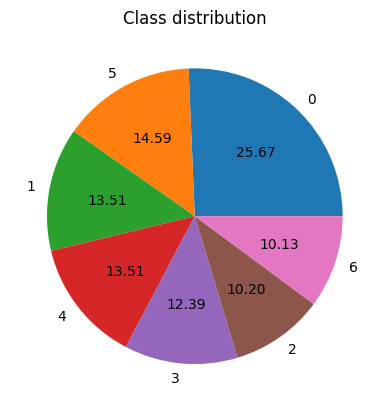

In [ ]:
plot_classes(train_set['jumlah_promosi'])

jumlah_promosi
0    783
5    445
1    412
4    412
3    378
2    311
6    309
Name: count, dtype: int64



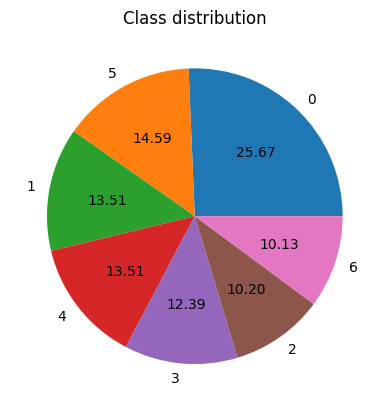

In [ ]:
plot_classes(y_train)

In [ ]:
# Perform resampling
X_train, y_train = balance_classes(X_train, y_train)

jumlah_promosi
3    783
6    783
1    783
5    783
4    783
2    783
0    783
Name: count, dtype: int64



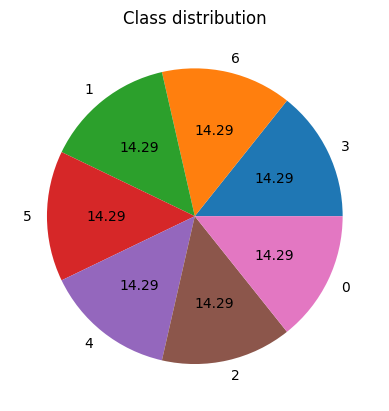

In [ ]:
# Plot class distribution after resampling
plot_classes(y_train)

In [ ]:
# Split predictor and target variable for validation set
X_val = val_set.drop(['jumlah_promosi'], axis=1)
y_val = val_set['jumlah_promosi']

In [ ]:
X_train

array([[0.00000000e+00, 1.96200000e+03, 1.70435626e+08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.97300000e+03, 1.71014909e+08, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.95100000e+03, 9.89620000e+07, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.96724912e+03, 1.71585034e+08, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.97619830e+03, 1.33860763e+08, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.97315198e+03, 5.28258043e+07, ...,
        5.37994196e-01, 4.62005804e-01, 0.00000000e+00]])

In [ ]:
X_val.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2464,0,1957.0,33742926.0,0.0,0.0,79.0,8109.0,25610.0,8792.0,5398.0,...,0,0,0,0,1,0,0,0,0,1
480,1,1976.0,140988476.0,0.0,0.0,45.0,102826.0,804331.0,52446.0,44966.0,...,0,0,0,0,1,0,0,0,1,0
2368,2,1979.0,29604689.0,1.0,0.0,57.0,0.0,6331.0,16100.0,12090.0,...,0,0,0,0,1,0,0,0,0,0
3457,3,1977.0,118810462.0,0.0,1.0,60.0,30193.0,172971.0,85239.0,72449.0,...,0,0,0,0,1,0,0,0,1,0
503,4,1972.0,129913133.0,0.0,0.0,49.0,30597.0,551015.0,29839.0,49816.0,...,0,0,0,0,1,0,0,0,0,1


### Implement Classifiers¶
In this section, we will implement classifiers to train on.

In [ ]:
# !pip install catboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

def train_clf(X_train, y_train, **kwargs):
    rfc = RandomForestClassifier(n_estimators=95, random_state=42, n_jobs=-1, **kwargs)
    # xgb = XGBClassifier(random_state=42)
    # catboost = CatBoostClassifier(random_state=42, verbose=0)
    lgbm = LGBMClassifier(random_state=42, learning_rate=0.25)
    # gbc = GradientBoostingClassifier(random_state=42)
    # svc = SVC(random_state=42)

    # Create the StackingClassifier with a Logistic Regression final estimator
    stacked_classifier = StackingClassifier(
        estimators=[
            ('rfc', rfc),
            # ('xgb', xgb),
            # ('catboost', catboost),
            # ('svc', svc),
            ('lgbm', lgbm),
        ],
        final_estimator=LogisticRegression(),
        cv=5,  # Number of cross-validation folds
        n_jobs=-1
    )

    stacked_classifier.fit(X_train, y_train)

    return stacked_classifier


# from sklearn.ensemble import RandomForestClassifier, StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from lightgbm import LGBMClassifier

# def train_clf(X_train, y_train, **kwargs):
#     # Random Forest Classifier
#     rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, **kwargs)

#     # LightGBM Classifier
#     lgbm = LGBMClassifier(num_leaves=20, max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)

#     # Stacking Classifier with Logistic Regression as final estimator
#     stacked_classifier = StackingClassifier(
#         estimators=[
#             ('rfc', rfc),
#             ('lgbm', lgbm),
#         ],
#         final_estimator=LogisticRegression(),
#         cv=5,  # Number of cross-validation folds
#         n_jobs=-1
#     )

    # Train the stacked classifier
    stacked_classifier.fit(X_train, y_train)

    return stacked_classifier


# def train_clf(X_train, y_train):
#     # Balance classes
#     X_train_balanced, y_train_balanced = balance_classes(X_train, y_train)

#     # Initialize individual classifiers
#     rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
#     xgb = XGBClassifier(random_state=42)
#     catboost = CatBoostClassifier(random_state=42, verbose=0)
#     lgbm = LGBMClassifier(random_state=42)

#     # Train individual classifiers
#     rfc.fit(X_train_balanced, y_train_balanced)
#     xgb.fit(X_train_balanced, y_train_balanced)
#     catboost.fit(X_train_balanced, y_train_balanced)
#     lgbm.fit(X_train_balanced, y_train_balanced)

#     # Initialize VotingClassifier
#     voting_clf = VotingClassifier(
#         estimators=[
#             ('rfc', rfc),
#             ('xgb', xgb),
#             ('catboost', catboost),
#             ('lgbm', lgbm)
#         ],
#         voting='soft'  # Use soft voting for probability averaging
#     )

#     # Train VotingClassifier
#     voting_clf.fit(X_train_balanced, y_train_balanced)

#     return voting_clf


I have experimented with different classifiers, including Random Forest, XGBoost, CatBoost, and Ensemble Methods. Based on my previous trials, the Stacking model has shown the best performance across all scoring metrics. Therefore, we will focus solely on building and tuning the Stacking model for the remainder of this project to save time and computational resources.

### Evaluation¶
In this section, we will evaluate the performance of our classifier on the training and validation set.

### Training Set Score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# params = {'class_weight': 'balanced'}
# clf = train_clf(X_train, y_train, **params)
# y_pred_train_clf = clf.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report

# print(f"{clf.__class__.__name__} Training Set Score")
# print()
# print(classification_report(y_pred_train_clf, y_train))

### Validation Set Score¶

In [ ]:
# y_pred_val_clf = clf.predict(X_val)
# y_pred_val_clf

In [ ]:
# print(f"{clf.__class__.__name__} Validation Set Score")
# print()
# print(classification_report(y_val, y_pred_val_clf))

### ROC Curve¶

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# def plot_ovr_roc_curve(y_true, y_prob):
#     n_classes = y_prob.shape[1]
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # Compute macro-average ROC curve
#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
#     mean_tpr = np.zeros_like(all_fpr)
#     for i in range(n_classes):
#         mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
#     mean_tpr /= n_classes
#     fpr["macro"] = all_fpr
#     tpr["macro"] = mean_tpr
#     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

#     # Plot ROC curves
#     plt.figure()
#     plt.plot(fpr["macro"], tpr["macro"],
#              label='macro-average ROC curve (AUC = {0:0.2f})'
#                    ''.format(roc_auc["macro"]),
#              color='navy', linestyle=':', linewidth=4)
#     for i in range(n_classes):
#         plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
#                                        ''.format(i, roc_auc[i]))
    # plt.plot([0, 1], [0, 1], 'k--', lw=2)
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('One-versus-Rest ROC curve')
    # plt.legend(loc="lower right")
    # plt.show()

In [ ]:
# # Predict probabilities for test set
# y_prob = clf.predict_proba(X_val)

# # Get true labels for test set
# n_samples = y_prob.shape[0]
# n_classes = clf.classes_.shape[0]
# y_true = np.zeros((n_samples, n_classes))
# for i in range(n_samples):
#     true_label = y_val.values[i]
#     y_true[i, true_label] = 1

In [ ]:
# plot_ovr_roc_curve(y_true, y_prob)
train_set

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2329,0,1962.0,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,...,1,0,0,0,0,1,0,0,0,0
394,0,1973.0,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,...,1,0,0,0,0,0,0,0,1,0
981,0,1951.0,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,...,0,0,0,0,1,0,0,0,1,0
1199,0,1966.0,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,...,0,0,0,0,1,0,0,0,0,1
3137,0,1959.0,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,0,1966.0,117173937.0,0.0,1.0,69.0,2229.0,95836.0,413.0,7147.0,...,0,1,0,0,0,0,0,0,1,0
1368,0,1951.0,134341710.0,0.0,0.0,27.0,100313.0,352545.0,28200.0,50102.0,...,0,0,1,0,0,0,0,1,0,0
2321,0,1974.0,155602000.0,1.0,0.0,0.0,216461.0,621061.0,285243.0,167909.0,...,0,0,0,0,1,0,0,1,0,0
3547,0,1972.0,117173937.0,0.0,1.0,19.0,76874.0,221993.0,97104.0,62713.0,...,0,0,0,0,1,0,0,0,1,0


### Prepare the Full Training Set¶
In this section, we will pass down the whole training set through the preprocessing pipeline and training the models on the entire resampled training set.

In [ ]:
# Create new pipeline object to fit on the original training set
pipeline_c = Pipeline([("imputer", FeatureImputer()),
                    ("encoder", FeatureEncoder())])

pipeline_r = Pipeline([("imputer", FeatureImputer()),
                    ("encoder", FeatureEncoder())])

### Final Strategy¶
We will preprocess the dataset separately for each hotel types. The machine learning model will also be trained on each of the segregated dataset.

In [ ]:
# kucing 1
# Retrieve original training set
# Split based on 'pendidikan' that has ['SMA', 'SMP', 'Sarjana', 'Magister', 'Doctor']

final_train = train_set

train_all = final_train

test_all = test_set
test_val = val_set

# Fit pipeline on each training set
# train_all = pipeline_c.fit_transform(train_all)

# Fit pipeline on test set
test_all = pipeline_r.fit_transform(test_all)
# test_val = pipeline_r.fit_transform(test_val)

# match the column
train_all = match_columns(train_set, train_all)

# match the column on test
test_all = match_columns(train_set, test_all)
test_val = match_columns(train_set, test_val)


X_train_all = train_all.drop(['jumlah_promosi'], axis = 1)
y_train_all = train_all['jumlah_promosi']


In [ ]:
# Handle imbalances
X_train_all, y_train_all = balance_classes(X_train_all , y_train_all)


### Cross Validation¶
In this section, we will perform a 5-fold cross validation on the training set.

In [ ]:
from sklearn.model_selection import StratifiedKFold

def evaluate_model(train_func, X, y, average, **params):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    acc = 0
    prec = 0
    rec = 0
    f1 = 0

    for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Apply resampling
        X_train_res, y_train_res = balance_classes(X_train, y_train)

        # Train and predict on the test data
        clf = train_func(X_train_res, y_train_res, **params)
        y_pred = clf.predict(X_test)
        print(f"Fold {i+1}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        print(f"Precision: {precision_score(y_test, y_pred, average=average)}")
        print(f"Recall: {recall_score(y_test, y_pred, average=average)}")
        print(f"F1-score: {f1_score(y_test, y_pred, average=average)}")
        print()

        acc += accuracy_score(y_test, y_pred)
        prec += precision_score(y_test, y_pred, average=average)
        rec += recall_score(y_test, y_pred, average=average)
        f1 += f1_score(y_test, y_pred, average=average)

    print("Averages")
    print(f"Accuracy: {acc / 5}")
    print(f"Precision: {prec / 5}")
    print(f"Recall: {rec / 5}")
    print(f"F1-score: {f1 / 5}")
    print()


In [ ]:
# evaluate_model(train_clf, X_train.values, y_train.values, 'macro', **{'class_weight': 'balanced'})

Cross Validation is done out of this notebook as it is computationally expensive with the current model.

Based on the provided performance metrics for a cross-validation on the model, the average accuracy achieved is 0.8544. Meanwhile the average precision and recall scores achieved were 0.856 and 0.85, respectively, while the average F1-score is 0.85. These metrics suggest that the model is performing reasonably well, but there may be room for improvement.

## Train Classifier on Each Training Set¶
Fitting the base classifier to the training set for both city and resort hotel types.

In [ ]:
# kucing 4
# Train Classifier
params = {'class_weight': 'balanced'}
clf_all = train_clf(X_train_all, y_train_all, **params)

# params = {'class_weight': 'balanced'}
# clf_all = train_clf(X_train_all, y_train_all)


### Analyze Feature Importance¶
In this section, we will analyze feature importance for the trained classifier.

In [ ]:
# def plot_feature_importance(importance, names, model_type):
#     # Create arrays from feature importance and feature names
#     feature_importance = np.array(importance)
#     feature_names = np.array(names)

#     # Create a DataFrame using a dictionary
#     data = {'feature_names': feature_names, 'feature_importance': feature_importance}
#     fi_df = pd.DataFrame(data)

#     # Sort the DataFrame in descending order of feature importance
#     fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

#     # Select the top ten most significant features
#     fi_df = fi_df.head(10)

#     # Define plot style
#     sns.set(style="whitegrid")

#     # Plot feature importance
#     fig, ax = plt.subplots(figsize=(10, 6))
#     sns.barplot(x=fi_df.feature_importance, y=fi_df.feature_names, palette="rocket")
#     plt.title(f"{model_type} Feature Importance")
#     plt.xlabel("Importance")
#     plt.ylabel("Feature")
#     plt.show()

def plot_feature_importance(importance, names, model_type):
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create a DataFrame using a dictionary
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    # Sort the DataFrame in descending order of feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    # Select the top ten most significant features
    fi_df = fi_df.head(10)

    # Define plot style
    sns.set(style="whitegrid")

    # Plot feature importance
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=fi_df.feature_importance, y=fi_df.feature_names, palette="rocket")
    plt.title(f"{model_type} Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

In [ ]:
# for est in clf_all.estimators_:
#     plot_feature_importance(est.feature_importances_, ['ID', 'tahun_kelahiran', 'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan', 'total_pembelian', 'total_belanja', 'total_anak', 'pendidikan_Doktor', 'pendidikan_Magister', 'pendidikan_SMA', 'pendidikan_SMP', 'pendidikan_Sarjana', 'status_pernikahan_Cerai', 'status_pernikahan_Cerai Mati', 'status_pernikahan_Menikah', 'status_pernikahan_Rencana Menikah', 'status_pernikahan_Sendiri'], est.__class__.__name__)


### Hyperparameter Tuning with TPE Optuna¶
In this section, we will tune the selected classifier with a Bayesian Optimization Tree-structured Parzen Estimator (TPE) algorithm provided by Optuna.

In [ ]:
def cross_val_oversample_score(clf, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = 0
    ctr = 0

    for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Apply resampling
        X_train_res, y_train_res = balance_classes(X_train, y_train)

        # Train and predict on the test data
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Fold {i+1}")
        print(f"F1-score: {f1_score(y_test, y_pred, average='macro')}")
        print()

        f1 += f1_score(y_test, y_pred, average='macro')
        ctr += 1

        if (f1_score(y_test, y_pred, average='macro') < 0.65):
            break

    print(f"Average: {f1 / ctr}")
    print()

    return f1 / ctr

In [ ]:
!pip install optuna

In [ ]:
import optuna

# Define objective function to be maximized
def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 0, 300, step=500)
    max_depth = trial.suggest_int('max_depth', 5, 20, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 1, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    class_weight = trial.suggest_categorical('class_weight', ['balanced'])
    n_jobs = -1
    random_state = 42

    clf = RandomForestClassifier( max_depth=max_depth,
                                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                  max_features=max_features, n_jobs=n_jobs, random_state=random_state, class_weight='balanced')

    mean_cv_score = cross_val_oversample_score(clf, X_train, y_train)
    return mean_cv_score

In [ ]:
#Create an Optuna study object and optimize the hyperparameters

study = optuna.create_study(direction='maximize', study_name='clf_study')
study.optimize(objective, n_trials=100)

# Print the best set of hyperparameters found
print('Best hyperparameters:', study.best_params)

In [ ]:
#Train a model with the best hyperparameters and evaluate its performance on the test data

best_clf = train_clf(X_train_all, y_train_all, **study.best_params)

In [ ]:
y_test_val = test_val['jumlah_promosi']

test_all.drop('jumlah_promosi', axis = 1, inplace=True)
test_val.drop('jumlah_promosi', axis = 1, inplace=True)

all_test_id = test_all['ID']
val_test_id = test_val['ID']

y_pred_all = best_clf.predict(test_all)
y_pred_val = best_clf.predict(test_val)

print(f"{clf_all.__class__.__name__} Validation Set Score")
print()
print(classification_report(y_test_val, y_pred_val))

### Predict
Making a prediction based on the trained classifier and the preprocessed test set.

In [ ]:
# kucing 5
y_test_val = test_val['jumlah_promosi']

test_all.drop('jumlah_promosi', axis = 1, inplace=True)
test_val.drop('jumlah_promosi', axis = 1, inplace=True)

all_test_id = test_all['ID']
val_test_id = test_val['ID']

y_pred_all = clf_all.predict(test_all)
y_pred_val = clf_all.predict(test_val)

print(f"{clf_all.__class__.__name__} Validation Set Score")
print()
print(classification_report(y_test_val, y_pred_val))

In [ ]:
final_df_all = pd.DataFrame(all_test_id)
final_df_val = pd.DataFrame(val_test_id)

final_df_all['jumlah_promosi'] = y_pred_all
final_df_val['jumlah_promosi'] = y_pred_val

In [ ]:
# final_df_doktor

In [ ]:
final_df_all

In [ ]:
# Filter rows where 'pendidikan' is null or '5'
# filtered_test_set = test_set[test_set['pendidikan'].isnull() | (test_set['pendidikan'] == '5')]

# Buat DataFrame baru dengan kolom 'ID' dari filtered_test_set dan 'jumlah_promosi' dengan nilai 0
# df_others = pd.DataFrame({
#     'ID': filtered_test_set['ID'],
#     'jumlah_promosi': 0
# })
# df_others

In [ ]:
# len(df_others)

In [ ]:
# final_df = pd.concat([final_df_sma, final_df_smp, final_df_sarjana, final_df_magister, final_df_doktor, df_others], axis=0)
# final_df
# final_df = final_df.sort_values(by='ID')

final_df = final_df_all

In [ ]:
final_df.to_csv('submission_athhh1.csv', index=False)

In [ ]:
# from google.colab import files
# files.download('submission_athhh1.csv')